## 4.8 전문가 지식 활용

### 1) 앤디 집 앞의 자전거가 대여가능한지 예측

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [11]:
import mglearn
citibike = mglearn.datasets.load_citibike()
print("시티 바이크 데이터 :\n{}".format(citibike.head(10)))

시티 바이크 데이터 :
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
2015-08-01 15:00:00    27
2015-08-01 18:00:00    12
2015-08-01 21:00:00     4
2015-08-02 00:00:00     3
2015-08-02 03:00:00     4
Freq: 3H, Name: one, dtype: int64


#### 한달동안의 대여 횟수를 그래프로 나타냄 (시계열데이터)

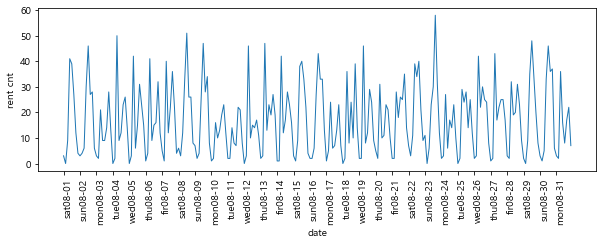

In [34]:
import pandas as pd
import numpy as np
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D') 
#freq=D 하루 날짜별 혹시 3일당 하려면 3D
week = ['sun', 'mon', 'tue', 'wed', 'thu','fir','sat']
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime('%w'),
                                             xticks.strftime('%m-%d'))]

plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('date')
plt.ylabel('rent cnt')
plt.show() 

#### 입력 특성은 대여가 일어난 날짜와 시간
* POSIX시간 특성 사용 = 1970년 1월 1일 이후 시간을 초로 나타냄
* 참조 사이트 : https://heavenly-appear.tistory.com/257

In [55]:
# 타깃값 추출 (대여 횟수)
y = citibike.values #몇대를 빌렸는지 나옴

#POSIX시간을 10**9로 나누어 변환
X = citibike.index.astype('int64').values.reshape(-1,1)
print(X)#시간을 초로 내타냄

# 처음 184개 데이터 포인트를 훈련 세트로 사용
n_train = 184 #23일치 데이터를 훈련세트로, 8일치 데이터는 테스터로(64개)
print(184/8) #하루 3시간마다 8회 조사

[[1438387200000000000]
 [1438398000000000000]
 [1438408800000000000]
 [1438419600000000000]
 [1438430400000000000]
 [1438441200000000000]
 [1438452000000000000]
 [1438462800000000000]
 [1438473600000000000]
 [1438484400000000000]
 [1438495200000000000]
 [1438506000000000000]
 [1438516800000000000]
 [1438527600000000000]
 [1438538400000000000]
 [1438549200000000000]
 [1438560000000000000]
 [1438570800000000000]
 [1438581600000000000]
 [1438592400000000000]
 [1438603200000000000]
 [1438614000000000000]
 [1438624800000000000]
 [1438635600000000000]
 [1438646400000000000]
 [1438657200000000000]
 [1438668000000000000]
 [1438678800000000000]
 [1438689600000000000]
 [1438700400000000000]
 [1438711200000000000]
 [1438722000000000000]
 [1438732800000000000]
 [1438743600000000000]
 [1438754400000000000]
 [1438765200000000000]
 [1438776000000000000]
 [1438786800000000000]
 [1438797600000000000]
 [1438808400000000000]
 [1438819200000000000]
 [1438830000000000000]
 [1438840800000000000]
 [143885160

* 날짜를 기준으로 훈련 데이터와 테스트 데이터로 나누고 결과 그래프로 그리는 함수 작성


In [49]:
def eval_on_features(features, target, regressor): #피처,타겟, 모델 넘어옴
    #훈련 세트와 테스트 세트 나누기
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print('테스트 세트 R^2:{:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha='left')
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    plt.plot(range(n_train), y_pred_train, '--', label='predict train')
    plt.plot(range(n_train, len(y_test) +n_train), y_pred, '--', label='predict test')
    plt.legend(loc=(1.01, 0))
    plt.xlabel('date')
    plt.ylabel('rent cnt')
    plt.show() 

테스트 세트 R^2:-0.04


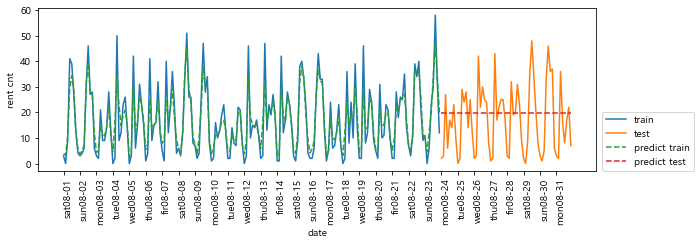

In [54]:
# 랜덤 포레스트 회귀 모델
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

* 입력 특성(POSIX 시간)범위 밖의 테스트 데이터에 대해 학습 불가능

테스트 세트 R^2:0.60


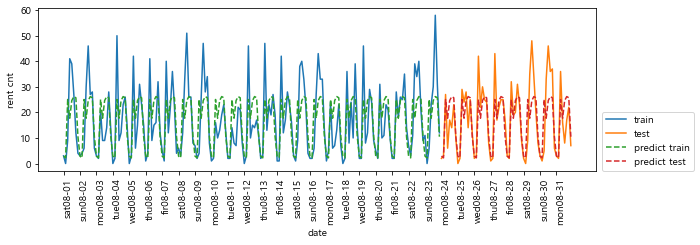

In [57]:
#시간(POSIX 시간 대신 hour) 특성 사용 만든 랜덤 포레스트 예측
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

* R이 훨씬 나아졌지만 주간 패턴은 예측하지 못함, 요일정보 추가

[[ 5  0]
 [ 5  3]
 [ 5  6]
 [ 5  9]
 [ 5 12]
 [ 5 15]
 [ 5 18]
 [ 5 21]
 [ 6  0]
 [ 6  3]]
테스트 세트 R^2:0.84


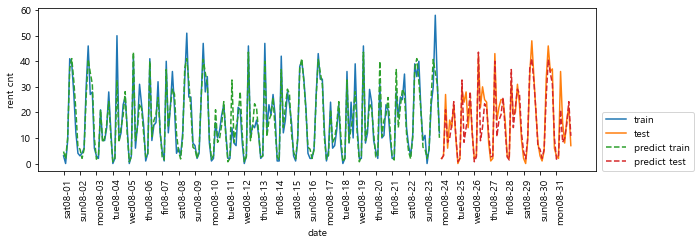

In [63]:
#시간과 요일 특성을 사용
import numpy as np
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                         citibike.index.hour.values.reshape(-1,1)])
print(X_hour_week[:10])
eval_on_features(X_hour_week, y, regressor)

* 위의 모델은 하루의 시간과 요일에 다른 주기적인 패턴을 따름
* R^2 은 0.84로 좋은 성능을 냄
* 모델이 학습한 것은 8월 23일까지 요일별 까지 넣어 요일별, 시간별 평균 대여 횟수를
보니<br> 주기적인 횟수까지 따라간다

#### LinearRegression 적용

[[5 0]
 [5 3]
 [5 6]]
테스트 세트 R^2:0.13


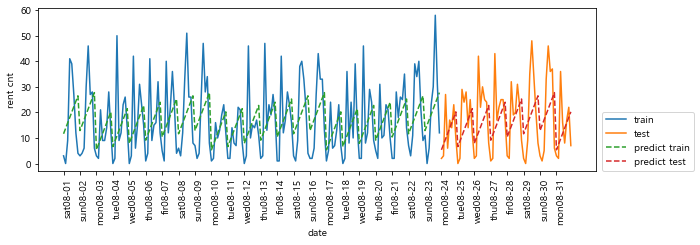

In [68]:
# 시간과 요일 특성을 사용 - 선형회귀(LinearRegression)
from sklearn.linear_model import LinearRegression
print(X_hour_week[:3])
eval_on_features(X_hour_week, y, LinearRegression())

* 시간과 요일 특성을 사용하여 만든 선형 회귀의 예측 : 성능이 안좋게 나옴
* 선형 모델은 시간을 선형 함수로만 학습할 수 있어서, 하루에서 시간이 흐를수록 대여수가 늘어나게 학습

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]
테스트 세트 R^2:0.62


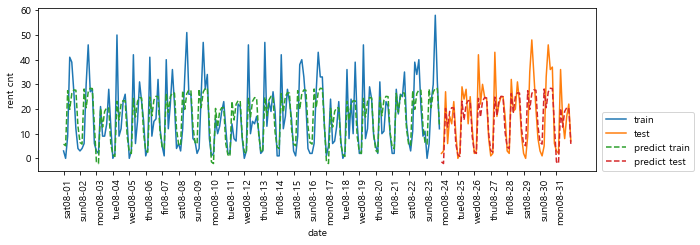

In [76]:
##원-핫 인코딩 사용 (시간을 범주형 변수로 바꿔) 선형회귀 모델 적용
from sklearn.linear_model import Ridge #릿지 선형모델(라쏘도 잇는데 주로 릿지 많이 씀, L1,L2규제 있음)
from sklearn.preprocessing import OneHotEncoder #데이터 전처리 (0과 1로)

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
print(X_hour_week_onehot) #3시간 마다 조사한 일과 요일이 0과 1로 나타남

eval_on_features(X_hour_week_onehot, y, Ridge()) #마지막은 모델값 : 릿지모델

테스트 세트 R^2:0.85


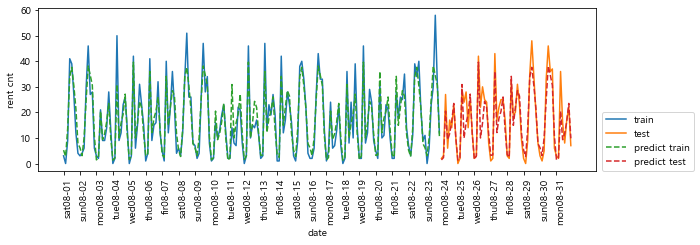

In [79]:
# 시간과 요일 조합한 상호작용 특성을 사용하여 선형회귀 모델 적용
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                     include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

* score는 랜덤포레스트와 비슷하다
* 하지만 차이점은 랜덤 포레스트는 어떤것을 학습한지 모른다. 그런데 선형 회귀 모델은 명확하게 알수 있다.

#### 시간과 요일 특성을 계수로 표시
* get_feature_names 메소드로 모든 상호작용 특성 이름 표시 선형 회귀

In [81]:
hour = ['%02d:00' % i for i in range(0,24,3)] #0에서 24시 까지 3시간마다
day = ['월', '화', '수', '목', '금', '토', '일']

In [83]:
# get_feature_names 메서드를 사용해 PolynamialFeatures로
# 모든 상호 작용 특성에 이름을 달아줌. 계수가 0이 아닌 특성만 선택
features = day + hour
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_!=0]
coef_nonzero = lr.coef_[lr.coef_!=0]

Text(0, 0.5, 'coef size')

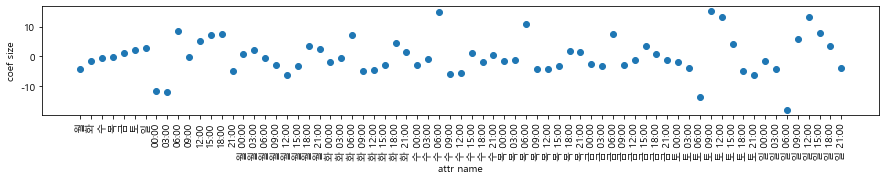

In [84]:
# 선형 모델에서 학습한 계수
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('attr name')
plt.ylabel('coef size')

* 랜덤 포레스트는 어떤것을 학습한지 모른다. 그런데 선형 회귀 모델은 명확하게 알수 있다.

* 24시간 간격으로 낮과 밤을 확실히 구분
* 주중과 주말의 패턴도 잘 보인다
* 시계열 데이털르 이용한 예측작업은 과거 데이터에서 학습하여 미래를 예측하는 방식
* (주가, 시계열 데이터, 밀가루가격 예상, 과일값 예상)
* 데이터를 훈련 세트와 테스트 세트로 나눌때 어떤 날짜까지의 모든 데이터를 훈련세트로 하고, 그 날짜 이후의 모든 데이터를 테스트 세트로 사용
* 랜덤포레스트는 전처리가 거의 필요하지 않아 맨처음 시도해보기 좋아 하지만 테스트 세트에 대해서 한가지값으로 예측 (잘안됨)
* 랜덤 포레스트와 특성 사이의 조합이 문제여서 POSIX 시간특성 사용했더니 훈련세트에 있는 특성 값의 범위 밖은 예측할수 없다.
* 트리 모델인 랜덤 포레스트는 훈련세트에 있는 특성의 범위 밖으로 외삽능력이 없다.
* 훈련 데이터의 그래프 보면 시간과 요일 두요소 중요 하여 시간을 추가했는데 POSIX는 안되어서 시간만 사용하여 만든 랜덤 포레스트 예측
* 패턴은 좋아졌으나 주간 패턴은 예측하지 못함
* 그래서 다시한번 요일을 추가하여 시간과 요일 특성을 사용해 하니 랜덤 포레스트가 84프로로 늘어나고 요일도 잘 인식하여 스코어도 늘어났다
* 하지만 랜덤포레스트의 단점은 어떤것을 학습한지모른다. 그래서 더 간단하고 어떤것을 학습한지 알수 있는 선형모델을 썼다.
* LinearRegression인데 훨신 성능이 나쁘다 왜냐하면 시간을 찍을수록 늘어나는 학습이 되고 있더라
* 이 패턴을 잡기 위해서 정수형을 범주형 변수로 원 핫 인코딩으로 바뀜 (사이킷런 릿지모델 통해)
* 이렇게 하니 62프로가 되었다. 이 시간 패턴이 모든 날에 걸쳐 공유
* 하지만 성능이 그렇게 좋아지진 않아 상호작용 특성을 이용
* polynomialFeatures로 하고 릿지 모델을 부르니 랜덤포레스트보다도 조금더 성능이 좋아졌다
* 그리고 무엇이 학습되었는지 더 명확히 볼수있다.
* 모델이 학습한 계수를 그래프로 나타낼수 있다.(시간과 요일)
* get_feature_names메서드를 사용해 추출한 상호작용 특성의 이름을 달아준다

* 원핫인코딩 범주형 변수처럼 머신러닝 알고리즘에 적합한 방식으로 표현하는 것이 중요하다
* 새로운 특성을 만드는 것과 데이터 특성을 유도하기 위해 전문가 지식 활용하는 것이 중요하다